In [1]:
# notebook datetime
import datetime
print(f'Notebook last run (end-to-end): {datetime.datetime.now()}')

Notebook last run (end-to-end): 2023-07-22 18:38:33.924075


In [3]:
# get helper_function.py from course github
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


--2023-07-23 02:40:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-23 02:40:59 (60.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data('10_food_classes_10_percent.zip')

--2023-07-22 03:52:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.251.163.128, 142.251.167.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   208MB/s    in 0.8s    

2023-07-22 03:52:33 (208 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
# walking through the directory
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [5]:
# creating train and test dirs
train_dir='10_food_classes_10_percent/train/'
test_dir='10_food_classes_10_percent/test/'

'tf.data.Dataset' API is much more efficient(faster) than 'ImageDataGenarator'. Specially on larger Dataset.

In [6]:
#Create Data inputs
import tensorflow as tf

IMAGE_SHAPE=(224,224)
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMAGE_SHAPE,
    label_mode='categorical',
    batch_size=32 # batch_size is 32 by default.

)

test_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMAGE_SHAPE,
    label_mode='categorical',

)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

here, "None" at shape represents batch_size. the batch_size is None due to it only being used during model training.

In [8]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
# see an example batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.37744904e+02 2.06744904e+02 1.15744896e+02]
   [2.39948990e+02 2.08948990e+02 1.17948982e+02]
   [2.37857147e+02 2.06857147e+02 1.16071434e+02]
   ...
   [2.46693893e+02 2.26693893e+02 1.57693893e+02]
   [2.43020386e+02 2.20020386e+02 1.53020386e+02]
   [2.44045990e+02 2.19045990e+02 1.53045990e+02]]

  [[2.35928558e+02 2.04928558e+02 1.13928574e+02]
   [2.35005096e+02 2.04005096e+02 1.13005104e+02]
   [2.34173462e+02 2.03173462e+02 1.12387756e+02]
   ...
   [2.45158112e+02 2.25158112e+02 1.56158112e+02]
   [2.38653046e+02 2.15653046e+02 1.47653046e+02]
   [2.43097046e+02 2.18428711e+02 1.50433716e+02]]

  [[2.38219376e+02 2.06576523e+02 1.16005104e+02]
   [2.39816330e+02 2.08173477e+02 1.17602043e+02]
   [2.35000000e+02 2.03357147e+02 1.13571426e+02]
   ...
   [2.49688873e+02 2.27331665e+02 1.57117401e+02]
   [2.45586670e+02 2.21586670e+02 1.51045837e+02]
   [2.37642822e+02 2.13076508e+02 1.41061172e+02]]

  ...

  [[1.74209167e+02 9.92091675e+01 0.00000000e+00]
   [1

Model0: Building a transfer learning model using functional API

In [10]:
#Create base model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
#Freeze the base model
base_model.trainable=False
#Create inputs into the base model
inputs=tf.keras.layers.Input(shape=(224,224,3), name='input layer')

#If using ResNet50V2, add this to speed up convergence, remove for EfficientNet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

#pass the inputs to the base model
x=base_model(inputs)
#check the datashape after passing to basemodel
print(f'shape after base_model: {x.shape}')

#Average pool the output of base_model
x=tf.keras.layers.GlobalAveragePooling2D(name='Global_average_pooling_laayer')(x)
print(f'Shape after averagePooling: {x.shape}')

#Create output activation layer
outputs=tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

#Combine the model
model_0=tf.keras.Model(inputs, outputs)

# compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#fit the model
history_10_percent=model_0.fit(
    train_data_10_percent,
    epochs=5,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data_10_percent,
    validation_steps=len(test_data_10_percent),
    callbacks=[create_tensorboard_callback('transfer_learning', '10_percent_feature_extraction')]
)

16705208/16705208 [==============================] - 0s 0us/step


shape after base_model: (None, 7, 7, 1280)
Shape after averagePooling: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230722-035331
Epoch 1/5
24/24 [==============================] - 265s 11s/step - loss: 1.8978 - accuracy: 0.4053 - val_loss: 1.3038 - val_accuracy: 0.7304
Epoch 2/5
24/24 [==============================] - 223s 10s/step - loss: 1.1108 - accuracy: 0.7480 - val_loss: 0.8745 - val_accuracy: 0.8052
Epoch 3/5
24/24 [==============================] - 219s 9s/step - loss: 0.8011 - accuracy: 0.8147 - val_loss: 0.7039 - val_accuracy: 0.8392
Epoch 4/5
24/24 [==============================] - 254s 11s/step - loss: 0.6411 - accuracy: 0.8627 - val_loss: 0.6146 - val_accuracy: 0.8524
Epoch 5/5
24/24 [==============================] - 220s 9s/step - loss: 0.5503 - accuracy: 0.8760 - val_loss: 0.5615 - val_accuracy: 0.8596


In [11]:
#check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [12]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

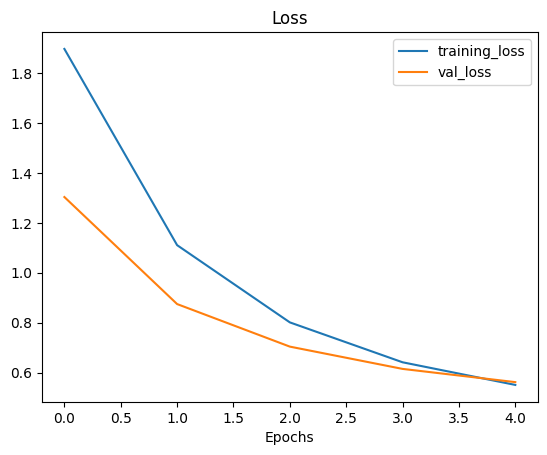

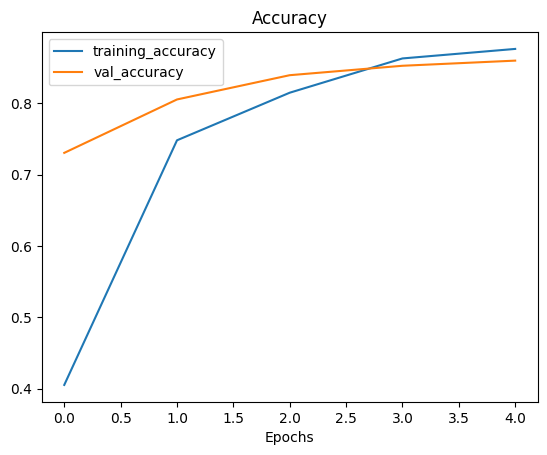

In [13]:
# check our model curves
plot_loss_curves(history_10_percent)

In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_average_pooling_laay  (None, 1280)             0         
 er (GlobalAveragePooling2D)                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [15]:
# Define input tensor shape (same number of dimensions as the output of efficientnetb0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")
# Pass the random tensor through a global max pooling 2d layer
global_max_pooled_tensor = tf.keras.layers.GlobalMaxPooling2D()(input_tensor)
print(f'2D global max pooled random tensor:\n{global_max_pooled_tensor}\n')


# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")
print(f"Shape of 2D global max pooled input tensor: {global_max_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840445 -0.28855976]]

2D global max pooled random tensor:
[[0.9058464 1.1603122 1.6994323]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)
Shape of 2D global max pooled input tensor: (1, 3)


Running a series of transfer leraning experiments


In [3]:
# download and unzip data (1% data)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

# unzip data
unzip_data('10_food_classes_1_percent.zip')


--2023-07-22 18:39:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  37.3MB/s    in 3.8s    

2023-07-22 18:39:31 (33.8 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [4]:
# data_dir for 1 percent
train_data_dir_1_percent = '/content/10_food_classes_1_percent/train/'
test_data_dir_1_percent = '/content/10_food_classes_1_percent/test/'

In [5]:
# walking through the dir
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There a

In [7]:
#load data
import tensorflow as tf
IMAGE_SIZE=(224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir_1_percent,
    label_mode='categorical',
    batch_size=32, #default
    image_size=IMAGE_SIZE

)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir_1_percent,
    image_size=IMAGE_SIZE,
    label_mode='categorical'
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
# Create a model for 1 percent data
base_model_1 = tf.keras.applications.EfficientNetB0(include_top=False)
# freeze the base model
base_model_1.trainable = False

# input layer
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')
# pass input to base_model
x = base_model_1(inputs)

# Pooling
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling')(x)

# Output layer
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

# combine input, output
model_1 = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 1s 0us/step


In [25]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [26]:
base_model_1.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_4 (Rescaling)        (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_2 (Normalization  (None, None, None,   7          ['rescaling_4[0][0]']            
 )                              3)                                                   

In [27]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [29]:
history_1_percent_1 = model_1.fit(
    train_data_1_percent,
    epochs=5,
    steps_per_epoch=len(train_data_1_percent),
    validation_data=test_data_1_percent,
    validation_steps=len(test_data_1_percent),
    callbacks=[create_tensorboard_callback('transfer_learning', '1_percent_traning_data_feature_extraction')]
)

Saving TensorBoard log files to: transfer_learning/1_percent_traning_data_feature_extraction/20230722-052440
Epoch 1/5
3/3 [==============================] - 207s 102s/step - loss: 2.0633 - accuracy: 0.3143 - val_loss: 2.1121 - val_accuracy: 0.2552
Epoch 2/5
3/3 [==============================] - 206s 102s/step - loss: 1.8327 - accuracy: 0.4857 - val_loss: 1.9744 - val_accuracy: 0.3720
Epoch 3/5
3/3 [==============================] - 207s 103s/step - loss: 1.6378 - accuracy: 0.7000 - val_loss: 1.8525 - val_accuracy: 0.4532
Epoch 4/5
3/3 [==============================] - 207s 102s/step - loss: 1.4610 - accuracy: 0.7714 - val_loss: 1.7433 - val_accuracy: 0.5168
Epoch 5/5
3/3 [==============================] - 207s 102s/step - loss: 1.2726 - accuracy: 0.8429 - val_loss: 1.6412 - val_accuracy: 0.5672


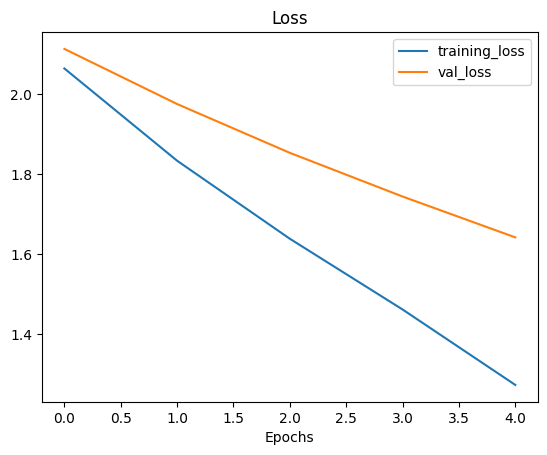

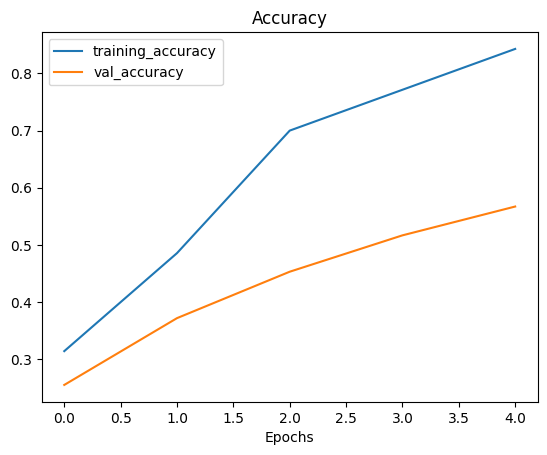

In [30]:
plot_loss_curves(history_1_percent_1)

In [9]:
# Data augmentation using Seqential API
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


data_augmentation=keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name='Data_Augmentation')

(-0.5, 511.5, 511.5, -0.5)

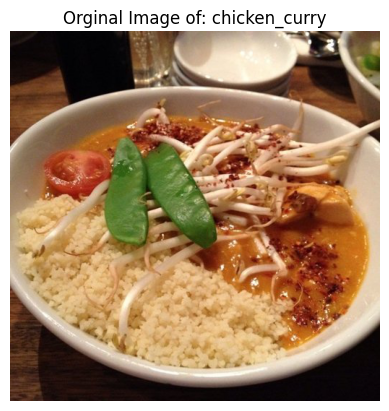

In [10]:
# Working with a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = '10_food_classes_1_percent/train/'+ target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir+'/'+random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Orginal Image of: {target_class}')
plt.axis(False)


(-0.5, 499.5, 488.5, -0.5)

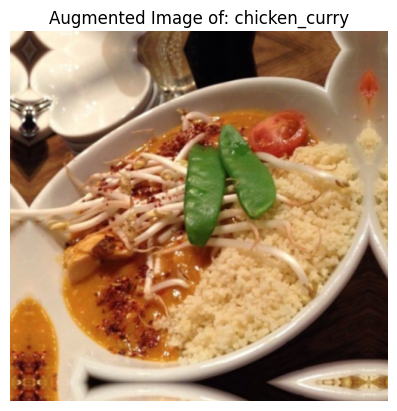

In [11]:
# Augmented Image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f'Augmented Image of: {target_class}')
plt.axis(False)

In [39]:
data_augmentation.summary()

ValueError: ignored

In [21]:
# model with augmented data
base_model_2 = tf.keras.applications.EfficientNetB0(include_top=False)
# Freeze
base_model_2.trainable=False
#inputs
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
#data augmentation
x=data_augmentation(inputs)
#put data on base_model
x = base_model_2(x, training=False)
#pooling
x=tf.keras.layers.GlobalAveragePooling2D(name='Global_Average_Pooling')(x)
#outputs
outputs=tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)
#combined
model_2=tf.keras.Model(inputs, outputs)

In [22]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Data_Augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_Average_Pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [16]:
base_model_2.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_6 (Rescaling)        (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_3 (Normalization  (None, None, None,   7          ['rescaling_6[0][0]']            
 )                              3)                                                   

In [23]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [24]:
history_2=model_2.fit(
    train_data_1_percent,
    epochs=5,
    steps_per_epoch=len(train_data_1_percent),
    validation_data=test_data_1_percent,
    validation_steps=len(test_data_1_percent),
    callbacks=[create_tensorboard_callback('transfer_learning', '1_percent_augmented_data')]
)

Saving TensorBoard log files to: transfer_learning/1_percent_augmented_data/20230722-192848
Epoch 1/5
3/3 [==============================] - 219s 103s/step - loss: 2.3755 - accuracy: 0.1000 - val_loss: 2.3061 - val_accuracy: 0.1368
Epoch 2/5
3/3 [==============================] - 207s 102s/step - loss: 2.1525 - accuracy: 0.1857 - val_loss: 2.1841 - val_accuracy: 0.2000
Epoch 3/5
3/3 [==============================] - 207s 102s/step - loss: 1.9483 - accuracy: 0.4143 - val_loss: 2.0714 - val_accuracy: 0.2792
Epoch 4/5
3/3 [==============================] - 208s 102s/step - loss: 1.7451 - accuracy: 0.5857 - val_loss: 1.9689 - val_accuracy: 0.3456
Epoch 5/5
3/3 [==============================] - 197s 97s/step - loss: 1.6086 - accuracy: 0.6714 - val_loss: 1.8764 - val_accuracy: 0.4116


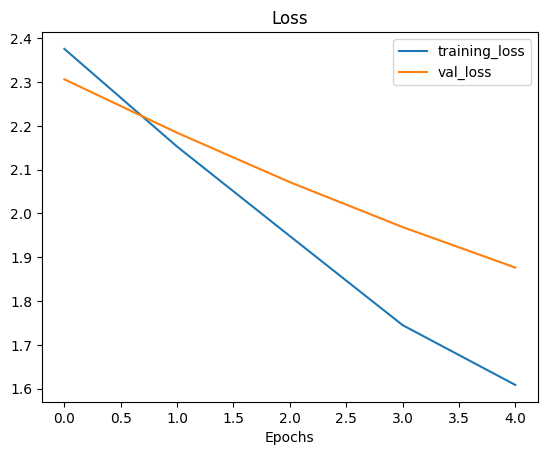

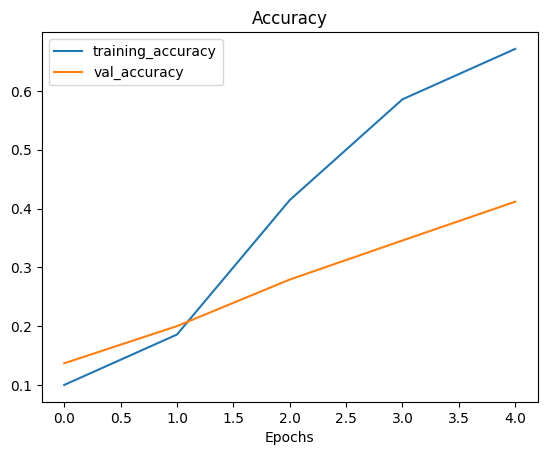

In [25]:
plot_loss_curves(history_2)

working with Augmented 10% training data

In [1]:
# data loading
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-07-23 02:40:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 108.177.112.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   199MB/s    in 0.8s    

2023-07-23 02:40:40 (199 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
# unzip data
unzip_data('10_food_classes_10_percent.zip')

In [5]:
# walking through the directory
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [40]:
# data loading
from tensorflow import keras
from tensorflow.keras import layers

train_dir_10_percent='/content/10_food_classes_10_percent/train/'
test_dir_10_percent='/content/10_food_classes_10_percent/test/'

IMAGE_SIZE=(224,224)

training_data_10_percent = keras.preprocessing.image_dataset_from_directory(
    train_dir_10_percent,
    label_mode = 'categorical',
    image_size=IMAGE_SIZE,
    batch_size=32

)
testing_data_10_percent = keras.preprocessing.image_dataset_from_directory(
    test_dir_10_percent,
    label_mode='categorical',
    image_size=IMAGE_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [41]:
# data augmentation using Sequential API
data_augmentation=keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name='data_augmentation')


In [42]:
#from re import X
# model for 10 percent augmented data
base_model_3 = keras.applications.EfficientNetB0(include_top=False)
# freeze
base_model_3.trainable=False
# inputs
input_shape = (224, 224, 3)
inputs = keras.layers.Input(shape=input_shape, name='input_layer')
# augmentation our data
x = data_augmentation(inputs)
# pass inputs to base model
x = base_model_3(x, training=False)
# pooling
x = keras.layers.GlobalAveragePooling2D(name='global_average_pooling')(x)
# output layer
outputs = keras.layers.Dense(10, activation='softmax', name='output_layer')(x)
# Combined into model
model_3 = keras.Model(inputs, outputs)

In [43]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [44]:
# compile the model
model_3.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

In [45]:
# fit the model
history_3 = model_3.fit(
   training_data_10_percent,
   epochs=5,
   steps_per_epoch=len(training_data_10_percent),
   validation_data=testing_data_10_percent,
   validation_steps=len(testing_data_10_percent),
   callbacks=[create_tensorboard_callback('transfer learning', '10 percent augmented data')]
)

Saving TensorBoard log files to: transfer learning/10 percent augmented data/20230723-033057


Epoch 1/5
24/24 [==============================] - 22s 579ms/step - loss: 1.9723 - accuracy: 0.3733 - val_loss: 1.4039 - val_accuracy: 0.7020
Epoch 2/5
24/24 [==============================] - 13s 523ms/step - loss: 1.2944 - accuracy: 0.6880 - val_loss: 0.9736 - val_accuracy: 0.7948
Epoch 3/5
24/24 [==============================] - 12s 520ms/step - loss: 0.9968 - accuracy: 0.7493 - val_loss: 0.7760 - val_accuracy: 0.8276
Epoch 4/5
24/24 [==============================] - 13s 536ms/step - loss: 0.8383 - accuracy: 0.8013 - val_loss: 0.6836 - val_accuracy: 0.8400
Epoch 5/5
24/24 [==============================] - 13s 526ms/step - loss: 0.7348 - accuracy: 0.8187 - val_loss: 0.6147 - val_accuracy: 0.8508


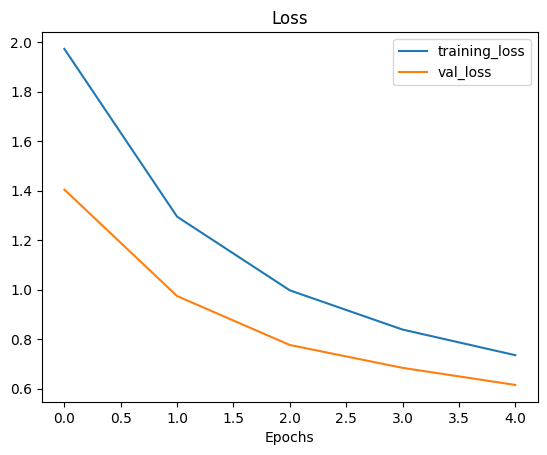

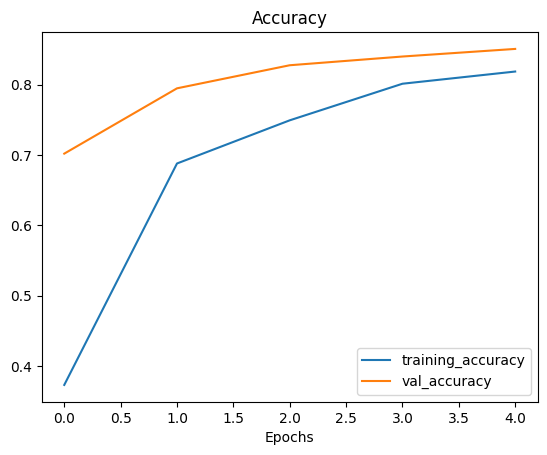

In [46]:
plot_loss_curves(history_3)

In [48]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

Creating a modelCheckPoint callback

In [49]:
from keras.saving.saving_lib import save_weights_only
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# Create ModelCheckPOint callback
checkpoint_callback = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      save_freq='epoch',
                                                      verbose=1)

In [50]:
# fit the model saving checkpoints every epoch
initial_epoch=5
history_10_percent_data_aug = model_3.fit(
    training_data_10_percent,
    epochs=initial_epoch,
    validation_data = testing_data_10_percent,
    validation_steps=len(testing_data_10_percent),
    callbacks=[create_tensorboard_callback('transfer_learning', '10_percent_data_aug'),
               checkpoint_callback]
)

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230723-033255
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 0.6726 - accuracy: 0.8320
Epoch 1: val_loss improved from inf to 0.58227, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 13s 527ms/step - loss: 0.6726 - accuracy: 0.8320 - val_loss: 0.5823 - val_accuracy: 0.8500
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.6043 - accuracy: 0.8680
Epoch 2: val_loss improved from 0.58227 to 0.54676, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 13s 523ms/step - loss: 0.6043 - accuracy: 0.8680 - val_loss: 0.5468 - val_accuracy: 0.8584
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.5553 - accuracy: 0.8653
Epoch 3: val_loss improved from 0.54676 to 0.52423, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [=

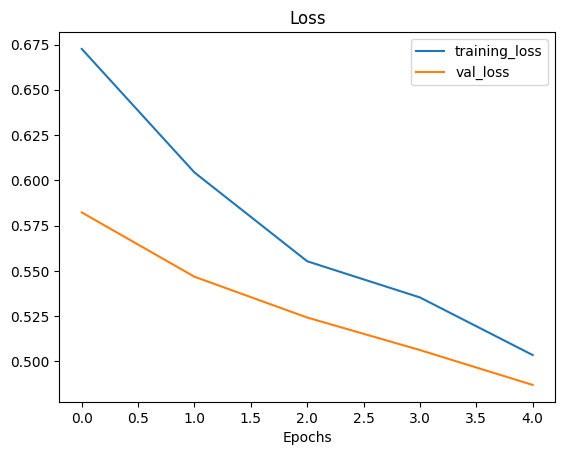

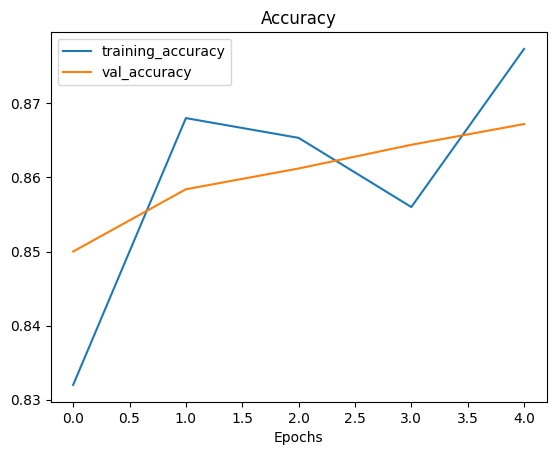

In [51]:
plot_loss_curves(history_10_percent_data_aug)

Everytime it's starts from the end.

In [52]:
# Load in saved model weights and evaluate model
model_3.load_weights(checkpoint_path)
loaded_weights_model_results = model_3.evaluate(testing_data_10_percent)

79/79 [==============================] - 7s 80ms/step - loss: 0.4870 - accuracy: 0.8672


In [53]:
# Evaluate on the test data
results_10_percent_data_aug = model_3.evaluate(testing_data_10_percent)
results_10_percent_data_aug

79/79 [==============================] - 6s 68ms/step - loss: 0.4870 - accuracy: 0.8672


[0.48702138662338257, 0.8672000169754028]

In [54]:
results_10_percent_data_aug==loaded_weights_model_results

False

In [55]:
# Check the difference between the two results
import numpy as np
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[-5.96046448e-08  0.00000000e+00]


FineTuning


In [56]:
model_3.layers

In [57]:
for layer in model_3.layers:
  print(layer.trainable)

True
True
False
True
True


In [58]:
print(len(model_3.layers[2].trainable_variables))

0


In [59]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model_3.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [60]:
base_model_3.trainable=True
# freeze all layers except for the last 10
for layer in base_model_3.layers[:-10]:
  layer.trainable = False

# recompile
model_3.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

In [61]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-train

In [62]:
# check trainable layers
for layer_number, layer in enumerate(base_model_3.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [63]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epoch + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_3.fit(training_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=testing_data_10_percent,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=len(testing_data_10_percent),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) # name experiment appropriately


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230723-033513
Epoch 5/10
24/24 [==============================] - 29s 679ms/step - loss: 0.5727 - accuracy: 0.8147 - val_loss: 0.4717 - val_accuracy: 0.8416
Epoch 6/10
24/24 [==============================] - 13s 524ms/step - loss: 0.2757 - accuracy: 0.9187 - val_loss: 0.4457 - val_accuracy: 0.8564
Epoch 7/10
24/24 [==============================] - 12s 491ms/step - loss: 0.1440 - accuracy: 0.9613 - val_loss: 0.5016 - val_accuracy: 0.8448
Epoch 8/10
24/24 [==============================] - 12s 493ms/step - loss: 0.1181 - accuracy: 0.9587 - val_loss: 0.4509 - val_accuracy: 0.8672
Epoch 9/10
24/24 [==============================] - 13s 539ms/step - loss: 0.0810 - accuracy: 0.9773 - val_loss: 0.4876 - val_accuracy: 0.8544
Epoch 10/10
24/24 [==============================] - 13s 530ms/step - loss: 0.1071 - accuracy: 0.9720 - val_loss: 0.4568 - val_accuracy: 0.8604


In [66]:
import matplotlib.pyplot as plt

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.8320000171661377, 0.8679999709129333, 0.8653333187103271, 0.8560000061988831, 0.8773333430290222, 0.8146666884422302, 0.918666660785675, 0.9613333344459534, 0.9586666822433472, 0.9773333072662354, 0.972000002861023]


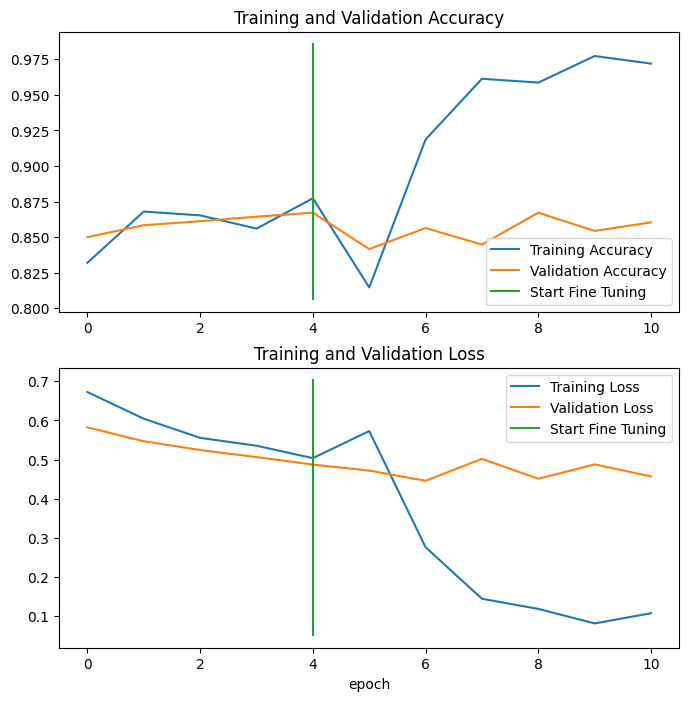

In [67]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)

### Let's take a break ⚾
⭐